<a href="https://colab.research.google.com/github/MonarchGohil/ssip_project/blob/main/facespoof_youtube_monarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting data from Google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Data Pre processing

In [2]:
!cp -r "/content/gdrive/MyDrive/final_antispoofing.zip" "/content"


In [3]:
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing.zip')
archive.extractall('/content')

In [4]:
dataset_dir = '/content/final_antispoofing'
train_dataset_dir = '/content/final_antispoofing/train'
test_dataset_dir = '/content/final_antispoofing/test'

In [5]:
#Pathway for creating new directory for dataset
import os
os.mkdir('/content/aantispoofing_dataset')
os.mkdir('/content/aantispoofing_dataset/train')
os.mkdir('/content/aantispoofing_dataset/test')
os.mkdir('/content/aantispoofing_dataset/train/real')
os.mkdir('/content/aantispoofing_dataset/train/spoof')
os.mkdir('/content/aantispoofing_dataset/test/real')
os.mkdir('/content/aantispoofing_dataset/test/spoof')

In [6]:
train_dir='/content/aantispoofing_dataset/train'
test_dir='/content/aantispoofing_dataset/test'

In [7]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type =='train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))





In [9]:
 train_test_splits(data_directory=dataset_dir)

In [10]:
categories = ['real','spoof']

Dataset Exploration

In [11]:
print ("---exploring training dataset---")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print ("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {}total images in training directory", format(s1+r1))

print ("---exploring test dataset---")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print ("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {}total images in training directory", format(r2+s2))



---exploring training dataset---
There are 2102 images in real directory
There are 2118 images in spoof directory
There are {}total images in training directory 4220
---exploring test dataset---
There are 477 images in real directory
There are 474 images in spoof directory
There are {}total images in training directory 951


Dataset Visualization

In [12]:
def get_images (data_dir, number_of_samples):
      image_path = []
      for category in categories:
        path = os.path.join(data_dir, category)
        i = 1
        for img in os.listdir (path):
          if i > number_of_samples:
            break
          else :
            image_path.append(os.path.join(path, img)) 
            i += 1
      return image_path



In [13]:
def visualize_dataset (image_path, rows, cols):
  fig= plt.figure(figsize=(20,20))
  for i in range(1,rows*cols + 1):
    fig.add_subplot(rows, cols, i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
  plt.show()


In [14]:
training_image_path = get_images(data_dir = train_dir, number_of_samples=25)
print(training_image_path)
print(len(training_image_path),)

['/content/aantispoofing_dataset/train/real/kjdfjsdkfj23.jpg', '/content/aantispoofing_dataset/train/real/WIN_20201110_13_24_09_Pro.jpg', '/content/aantispoofing_dataset/train/real/Suraj Khanal32brightness1.22.jpg', '/content/aantispoofing_dataset/train/real/dfjsdfjk46.jpg', '/content/aantispoofing_dataset/train/real/Sunil Koirala22hr_flipbrightness0.72.jpg', '/content/aantispoofing_dataset/train/real/prabhatale4510.jpg', '/content/aantispoofing_dataset/train/real/Samir Gurung13.jpg', '/content/aantispoofing_dataset/train/real/Sunil Koirala23.jpg', '/content/aantispoofing_dataset/train/real/jfdhfjhsdjf44.jpg', '/content/aantispoofing_dataset/train/real/fjkdj16.jpg', '/content/aantispoofing_dataset/train/real/kjdfjsdkfj40.jpg', '/content/aantispoofing_dataset/train/real/Sunil Koirala50hr_flip.jpg', '/content/aantispoofing_dataset/train/real/Salina Xetri7.jpg', '/content/aantispoofing_dataset/train/real/Sudeep Subedi29hr_flip.jpg', '/content/aantispoofing_dataset/train/real/received_8214

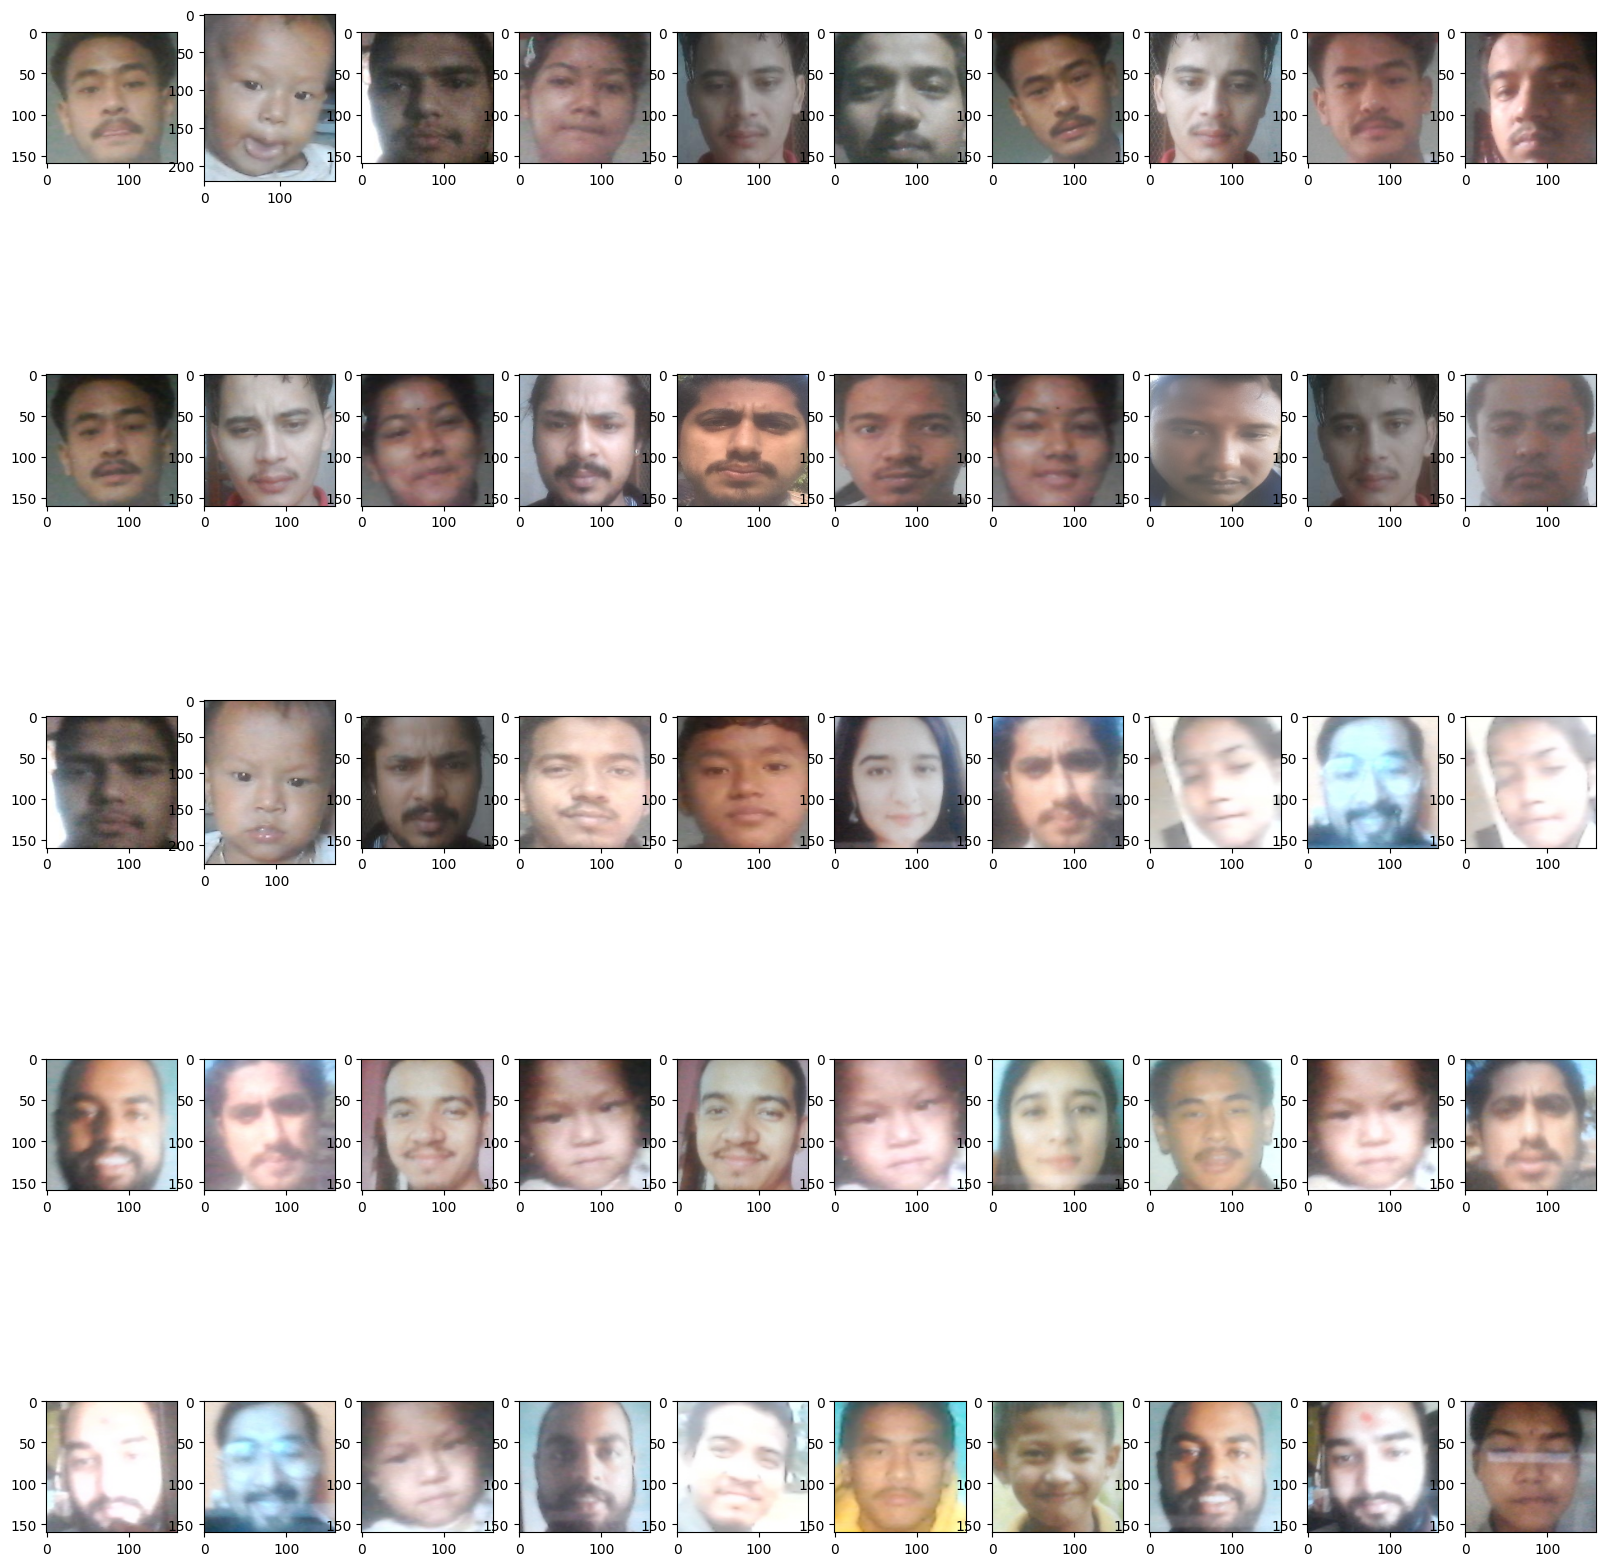

In [15]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

In [16]:
testing_image_path = get_images(data_dir= test_dir, number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path),)

['/content/aantispoofing_dataset/test/real/Sudeep Subedi21brightness0.54.jpg', '/content/aantispoofing_dataset/test/real/Sudeep Subedi17brightness0.71.jpg', '/content/aantispoofing_dataset/test/real/Sunil Koirala11hr_flipbrightness0.77.jpg', '/content/aantispoofing_dataset/test/real/WIN_20201110_10_05_34_Prohr_flip.jpg', '/content/aantispoofing_dataset/test/real/Sumit tamang20.jpg', '/content/aantispoofing_dataset/test/real/WIN_20201110_13_24_04_Probrightness0.83.jpg', '/content/aantispoofing_dataset/test/real/cxvffhgduyguj42.jpg', '/content/aantispoofing_dataset/test/real/20201110_144657.jpg', '/content/aantispoofing_dataset/test/real/Sudeep Subedi27.jpg', '/content/aantispoofing_dataset/test/real/Sunil Koirala46brightness0.66.jpg', '/content/aantispoofing_dataset/test/real/ghfdtrdtfyh32.jpg', '/content/aantispoofing_dataset/test/real/ddfgfhg37.jpg', '/content/aantispoofing_dataset/test/real/Shikshya Gautam50.jpg', '/content/aantispoofing_dataset/test/real/Shikshya Gautam6hr_flip.jpg'

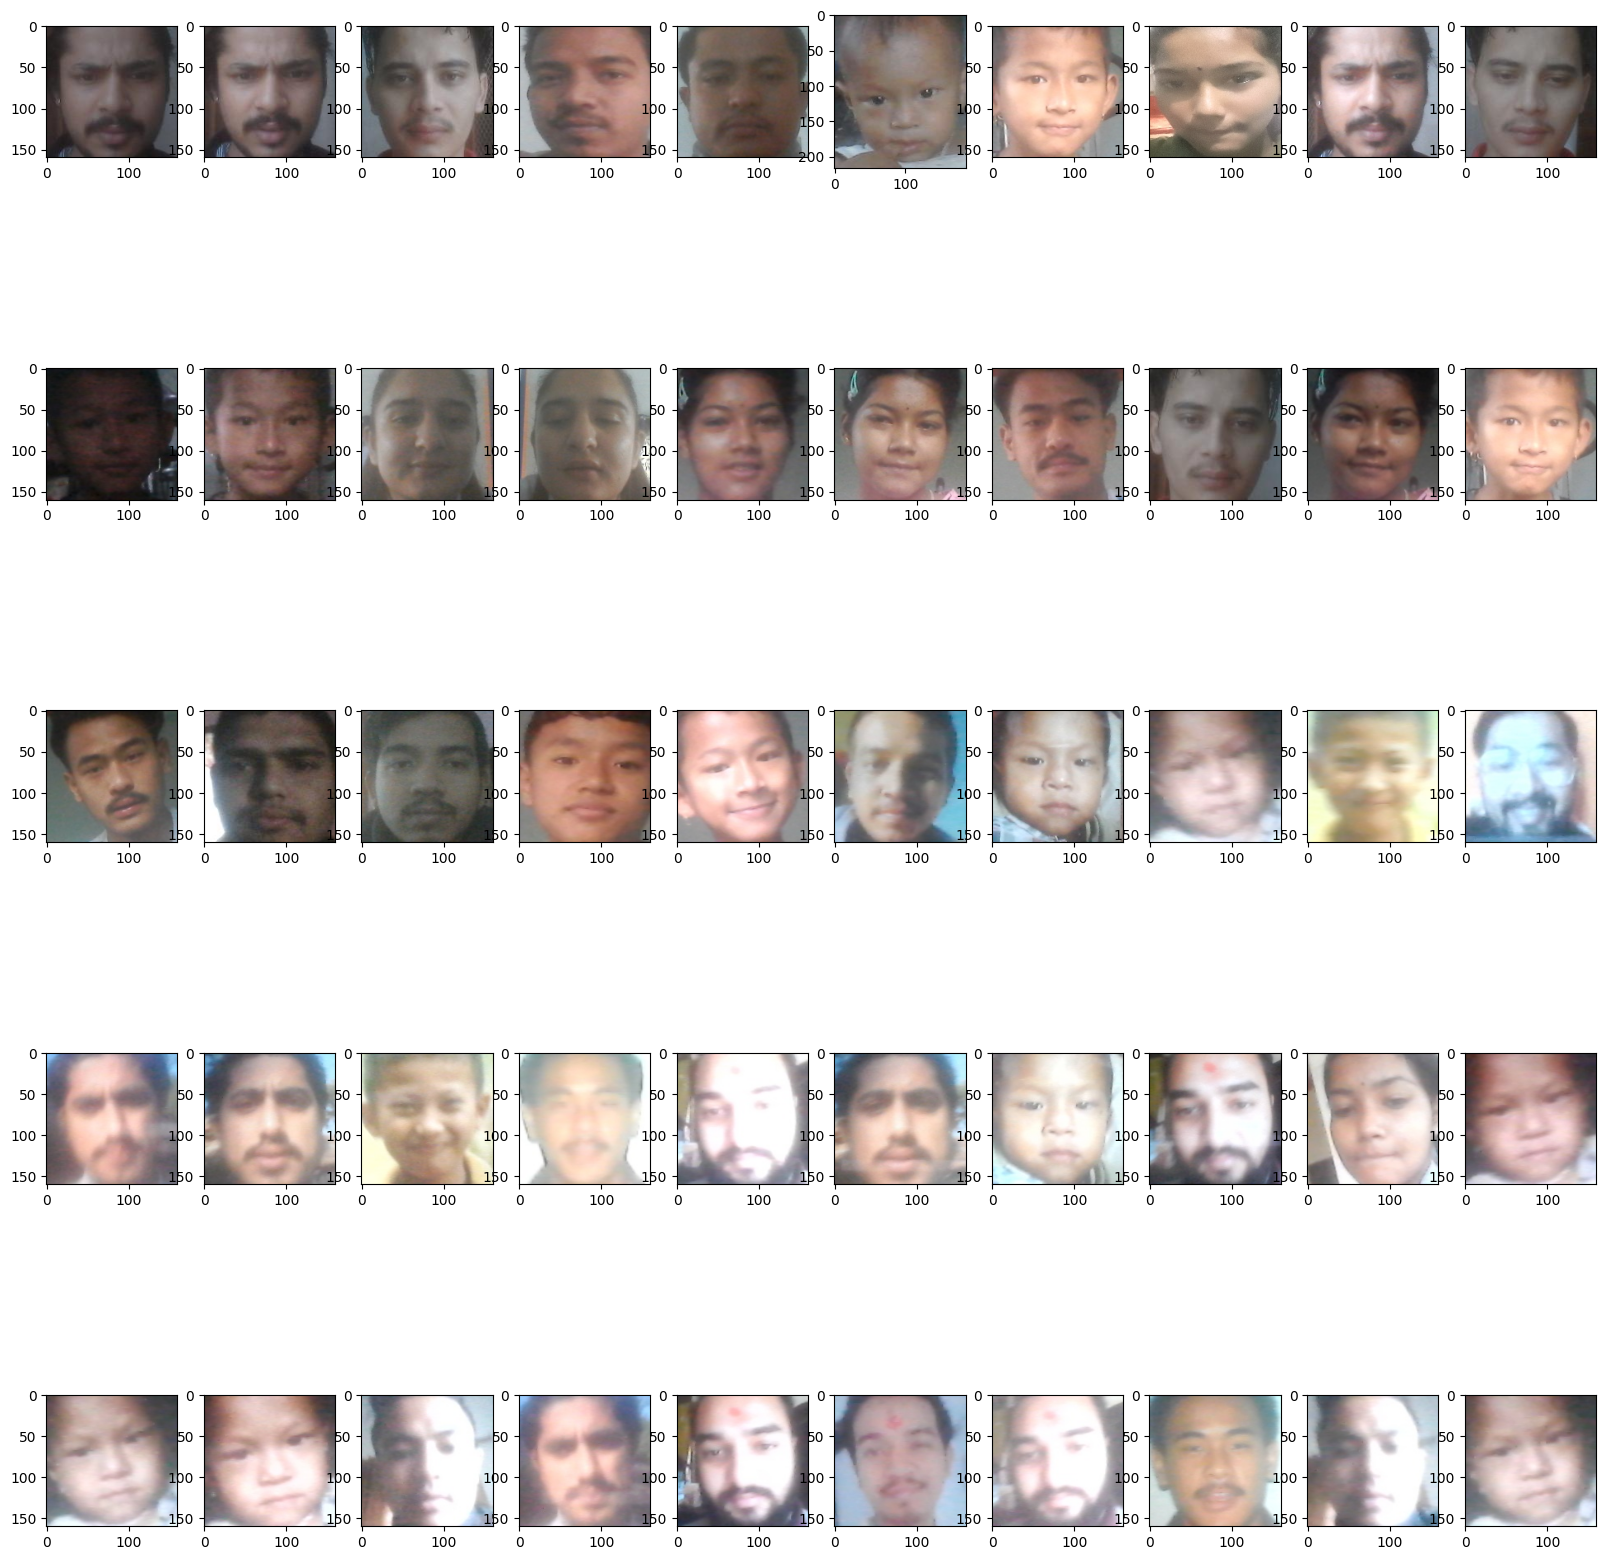

In [17]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

Model Formation

Choosing framework and importing necessary libraries

In [18]:
from keras.layers import Dense, Dropout, Input, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint 
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

In [19]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2, height_shift_range=0.2,fill_mode='nearest' , shear_range=0.2 , zoom_range=0.3 , rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',class_mode='binary',batch_size=25,shuffle=True)

Found 4220 images belonging to 2 classes.


In [22]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',class_mode='binary',batch_size=25,shuffle=True)

Found 951 images belonging to 2 classes.


Model selection and transfer learning

In [23]:
mobilenet = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(160,160,3)))

9406464/9406464 [==============================] - 0s 0us/step


In [24]:
mobilenet.trainable= False

In [25]:

output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units=8,activation ='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)


In [26]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

In [27]:
model.compile(
     loss='binary_crossentropy',
    optimizer=Adam(
        learning_rate=0.000001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon = 1e-07
    ),
    metrics = ['accuracy']
)

Setting our model checkpoints


In [28]:
import os
os.mkdir('/content/model_weights/')

In [29]:
model_checkpoint= ModelCheckpoint('./model_weights/monarch_project_antispoofing_model{epoch:02d}-{val_accuracy:.6f}.h5',monitor='val_loss',mode='min',verbose=1, save_best_only=True,save_weights_only=True)

In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks = [model_checkpoint]
)

<ipython-input-34-f3fba9da31ef>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
111/168 [==================>...........] - ETA: 13s - loss: 0.0928 - accuracy: 0.9697

KeyboardInterrupt: ignored

In [31]:
# serialize model to json
model_json = model.to_json()
with open("monarch_project_antispoofing_model_mobilenet.json","w")as json_file:
    json_file.write(model_json)

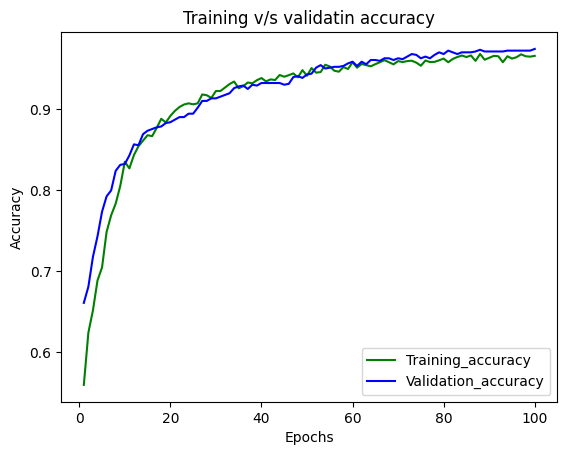

In [32]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epoch= range(1,101)
plt.plot(epoch,train_accuracy,'g',label='Training_accuracy')
plt.plot(epoch,validation_accuracy,'b',label='Validation_accuracy')
plt.title('Training v/s validatin accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


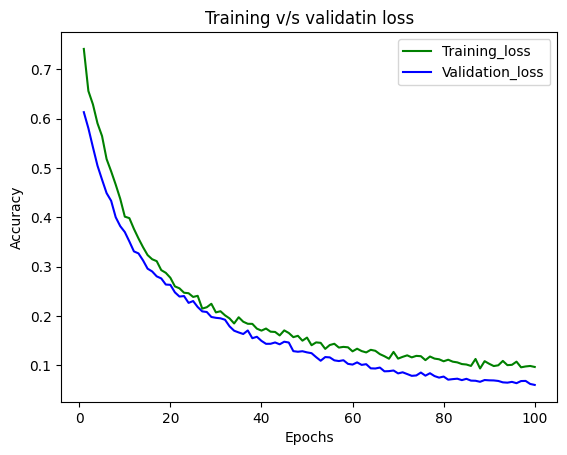

In [33]:
import matplotlib.pyplot as plt
train_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
epoch= range(1,101)
plt.plot(epoch,train_accuracy,'g',label='Training_loss')
plt.plot(epoch,validation_accuracy,'b',label='Validation_loss')
plt.title('Training v/s validatin loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
